# The Music of the Sphere: Fourier Series Representation of the Horizon-scale Potential

*Phil Marshall, Laurence Perreault Levasseur and Roger Blandford, August-October 2015*

In this notebook we look at some simulated potential fields, and predict the CMB temperature map from them.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline
import healpy as hp
import numpy as np
import beatbox


# 1. Generating and Visualizing a 3D Potential

Our plan is to use a simple Fourier series, with terms lying within some sphere in k-space, to represent the potential on horizon scales. Let's instantiate such a "beatbox" universe and generate a Gaussian random potential field in it, using a simple inflation model to generate a power spectrum and then populate the covariance matrix.

In [180]:
We = beatbox.Universe(truncated_nmax=None, truncated_nmin=1, truncated_lmax=10, truncated_lmin=1)
We.generate_a_random_potential_field(high_k_cutoff=We.high_k_cutoff, low_k_cutoff=We.low_k_cutoff, n_s=0.96, kstar=0.02, PSnorm=2.43e-9, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)

Generated  110  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 5.2e-06


Now, let's visualize the 3D potential field, with `yt`. We're trying to make a plot like [this one](http://yt-project.org/doc/_images/vr_sample.jpg), as shown in the [volume rendering tutorial](http://yt-project.org/doc/visualizing/volume_rendering.html). [This `gist` (from Sam Skillman)](https://gist.github.com/samskillman/0e574d1a4f67d3a3b1b1) uses a development version of `yt` to do the rendering, but does show how to use `yt` data structures.

In [ ]:
# !pip install --upgrade Cython
# !pip install --upgrade yt


In [120]:
import yt 

# yt.visualization.color_maps.show_colormaps()


yt : [INFO     ] 2015-12-05 10:48:08,006 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-12-05 10:48:08,006 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-12-05 10:48:08,007 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2015-12-05 10:48:08,008 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2015-12-05 10:48:08,009 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-12-05 10:48:08,044 Loading field plugins.
yt : [INFO     ] 2015-12-05 10:48:08,045 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-05 10:48:08,047 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-05 10:48:08,049 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-05 10:48:08,052 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-12-05 10:48:08,053 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-12-05 10:48:08,054 Loaded geometric (112 ne

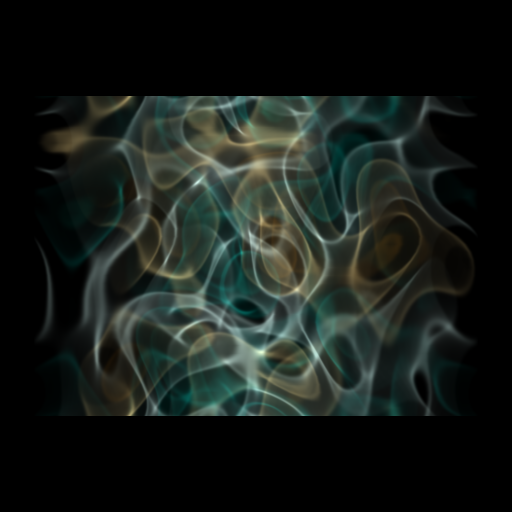

In [5]:
We.show_potential_with_yt(angle=np.pi/2,  N_layer=5, cmap='BrBG', show3D=1)

#from IPython.display import Image
#Image('test1.png',width=400)

In [ ]:
# !pip install --upgrade images2gif
# !pip install --upgrade PIL

In [ ]:
We.show_potential_from_all_angles_with_yt(output='phi6.gif')

In [46]:
from IPython.core.display import Image


In [48]:
Image(url='phi5.gif',width=300)


# 2. Predicting the CMB Temperature Map

When we get to doing the inverse problem, we'll be sampling from the posterior PDF for the potential coefficients $f_n$, and will need to check that these models are indeed plausible. The first model check we will do will be visual, and will involve making mock CMB temperature maps for our model potentials (see [issue 8](https://github.com/rogerblandford/Music/issues/8)).

So, let's convert the Fourier coefficients `fn` into `alm`'s, using the appropriate response matrix:

In [215]:
We.transform_3D_potential_into_alm()


made it to put_alm!!


beatbox/universe.py:324: RuntimeWarning: divide by zero encountered in divide
  k, theta, phi = self.k[ind], np.arctan(self.ky[ind]/self.kx[ind]), np.arccos(self.kz[ind]/self.k[ind])
beatbox/universe.py:324: RuntimeWarning: invalid value encountered in divide
  k, theta, phi = self.k[ind], np.arctan(self.ky[ind]/self.kx[ind]), np.arccos(self.kz[ind]/self.k[ind])


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


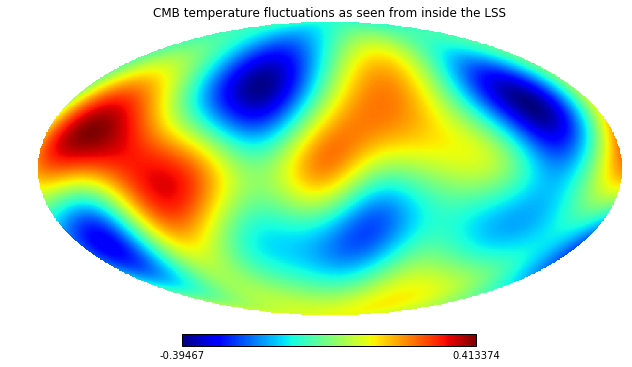

In [216]:
#Simulation with lmax=10
We.show_CMB_T_map(from_perspective_of="observer")

This shows a simulation that included from the dipole up to lmax=10. Looks right to me. 


When plotting up to lmax=30 it looks like it behave like we should expect, too.

Generated  902  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 7.6e-06
made it to put_alm!!
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


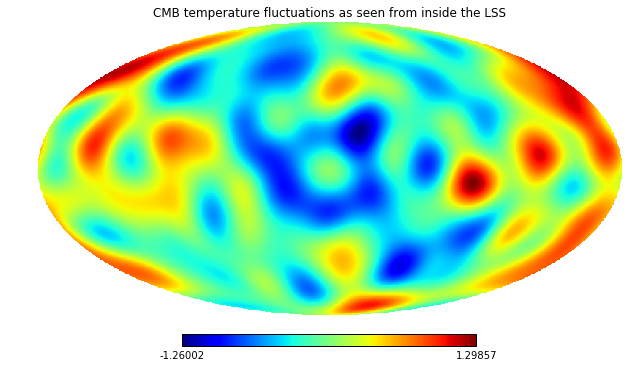

In [176]:
#Simulation with truncated_lmax=30
We2 = beatbox.Universe(truncated_nmax=None, truncated_nmin=1, truncated_lmax=30, truncated_lmin=1)
We2.generate_a_random_potential_field(high_k_cutoff=We2.high_k_cutoff, low_k_cutoff=We2.low_k_cutoff, n_s=0.96, kstar=0.02, PSnorm=2.43e-9, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We2.transform_3D_potential_into_alm()
We2.show_CMB_T_map(from_perspective_of="observer")

In [168]:
print len(We2.ay), len(We2.lms)

960 960


Generated  26  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 3e-06
made it to put_alm!!
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


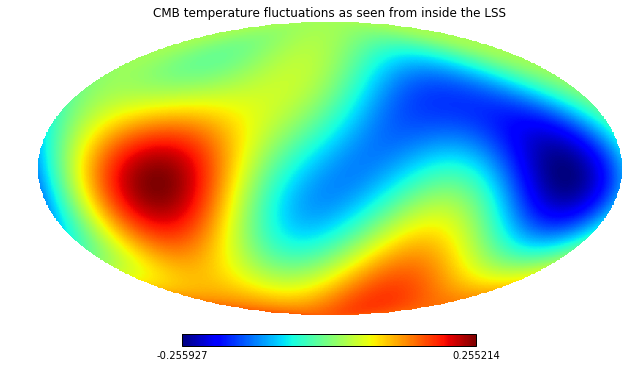

In [221]:
#Make another universe with truncated_lmax=8
We3 = beatbox.Universe(truncated_nmax=None, truncated_nmin=1, truncated_lmax=8, truncated_lmin=1)
We3.generate_a_random_potential_field(high_k_cutoff=We3.high_k_cutoff, low_k_cutoff=We3.low_k_cutoff, n_s=0.96, kstar=0.02, PSnorm=2.43e-9, Pdist=1, Pmax=np.pi, Pvar=np.pi/8)
We3.transform_3D_potential_into_alm()
We3.show_CMB_T_map(from_perspective_of="observer")

In [219]:
#Test if the ay we get have the right properties to make real fields 
print We.ay[0:3]
print We.ay[3:8]
print We.ay[8:15]

[-0.00441677+0.10035718j  0.00402008+0.j          0.00441677+0.10035718j]
[-0.01531818-0.20065277j -0.00797179-0.05138507j -0.14740220+0.j
  0.00797179-0.05138507j -0.01531818+0.20065277j]
[ 0.02524422+0.02341999j  0.12005129-0.20492753j  0.00977705-0.09913382j
 -0.12228090+0.j         -0.00977705-0.09913382j  0.12005129+0.20492753j
 -0.02524422+0.02341999j]


We do have $a_{lm} = (-1)^m * a_{lm}^\dagger$ , so they will give a real map and we won't throw out any info in building self.alm

# Test 1: Recovering the $a_y$'s from T maps
What if we tried to recover the $a_y$ vector from reading these maps?

In [220]:
We.decompose_T_map_into_spherical_harmonics(lmax=10)
ay_recovered=We.alm2ay()
print ay_recovered[0:3]
print ay_recovered[3:8]
print ay_recovered[8:15]

[-0.00441677+0.10035718j  0.00402008+0.j          0.00441677+0.10035718j]
[-0.01531818-0.20065277j -0.00797179-0.05138507j -0.14740220+0.j
  0.00797179-0.05138507j -0.01531818+0.20065277j]
[ 0.02524422+0.02341999j  0.12005129-0.20492753j  0.00977705-0.09913382j
 -0.12228090+0.j         -0.00977705-0.09913382j  0.12005129+0.20492753j
 -0.02524422+0.02341999j]


In [83]:
print We.ay[0:3]
print We.ay[3:8]
print We.ay[8:15]

[ -7.66306774e-05-0.50246556j  -6.29698337e-01+0.j
   7.66306774e-05-0.50246556j]
[  4.06621974e-01+0.29868932j   3.68875701e-04-0.06779229j
  -7.47922467e-02+0.j          -3.68875701e-04-0.06779229j
   4.06621974e-01-0.29868932j]
[  4.37985215e-04-0.10695991j   2.61268342e-01+0.18807955j
   1.69630944e-04+0.09046586j   1.29260450e-01+0.j
  -1.69630944e-04+0.09046586j   2.61268342e-01-0.18807955j
  -4.37985215e-04-0.10695991j]


And it works!!! Let's try to plot it to make sure they all match:

In [232]:
pltxaxislim=max(np.absolute(We.alm.real))+0.1
pltyaxislim=max(np.absolute(We.alm.imag))+0.1

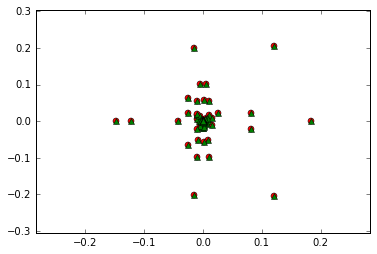

In [233]:
import matplotlib.pyplot as plt
plt.plot(We.ay.real, We.ay.imag, 'ro', ay_recovered.real, ay_recovered.imag, 'g^')
plt.axis([-pltxaxislim , pltxaxislim, -pltyaxislim, pltyaxislim])
plt.show()

# Test 2: Reconstructing the $T$ map from 3D samples of phi $\phi$
Lets reconstruct the Mollweide from Roger's data:

In [101]:
We4 = beatbox.Universe(truncated_nmax=3, truncated_nmin=0, truncated_lmax=8, truncated_lmin=0)

In [102]:
f_n, k_y, k_x, k_z= We4.load_mathematica_data()


In [103]:
print k_x.shape, k_y.shape, k_z.shape

(122,) (122,) (122,)


In [109]:
#In case we need n1, n2, n3 at some point...:
n1, n2, n3 = (k_x/(np.pi/2)).astype(int), (k_y/(np.pi/2)).astype(int), (k_z/(np.pi/2)).astype(int)
k_norm=np.sqrt(k_x**2+k_y**2+k_z**2)
k, theta, phi = k_norm[:61], np.arctan2(k_y[:61],k_x[:61]), np.arccos(k_z[:61]/k_norm[:61])
theta[np.isnan(theta)] = np.pi/2.0

In [110]:
NY = (We4.truncated_lmax + 1)**2-(We4.truncated_lmin)**2
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
#    for the sin coefficients
NN = len(f_n)
R = np.zeros([NY,NN], dtype=np.complex128)

In [118]:
from scipy.special import sph_harm,sph_jn
lms=[(l, m) for l in range(We4.truncated_lmin,We4.truncated_lmax+1) for m in range(-l, l+1)]
# Get ready to loop over y
y=0
A=[sph_jn(We4.truncated_lmax,ki)[0] for ki in k]        
# Loop over y, computing elements of R_yn 
for i in lms:        
    l=i[0]
    m=i[1]

    trigpart = np.cos(np.pi*l/2.0)
    B=np.asarray([A[ki][l] for ki in range(len(k))])
            
    R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    R[y,-1:NN/2-1:-1] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y=y+1

In [119]:
ay=np.dot(R,f_n)
We4.ay=ay
# Reorganize a_y into a_lm
We4.ay2alm(ay, usedefault=1)

made it to put_alm!!


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


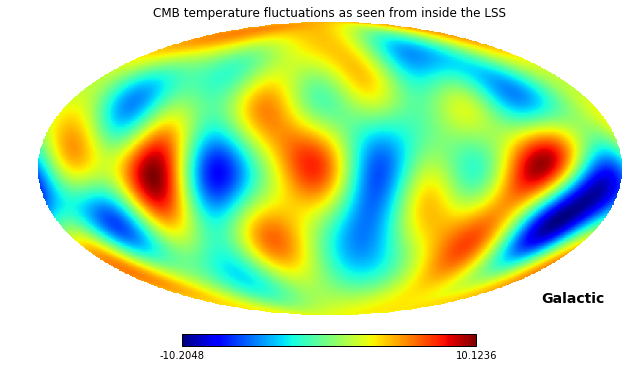

In [162]:
#We4.alm=-1*We4.alm
We4.show_CMB_T_map(from_perspective_of="observer")

This is exactly Fig 3 b from the proposal! Hurray!!

### Attempting to work only with real $a_y$'s do exactly like in the Allegro paper:

made it to put_alm!!
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


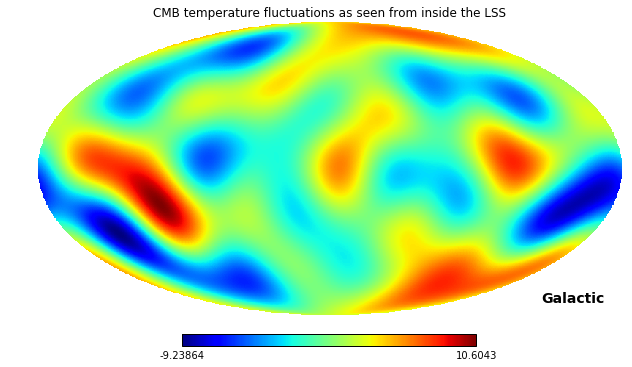

In [154]:
We5 = beatbox.Universe(truncated_nmax=3, truncated_nmin=0, truncated_lmax=8, truncated_lmin=0)
f_n, k_x, k_y, k_z= We5.load_mathematica_data()

#In case we need n1, n2, n3 at some point...:
n1, n2, n3 = (k_x/(np.pi/2)).astype(int), (k_y/(np.pi/2)).astype(int), (k_z/(np.pi/2)).astype(int)
k_norm=np.sqrt(k_x**2+k_y**2+k_z**2)
k, theta, phi = k_norm[:61], np.arctan2(k_y[:61],k_x[:61]), np.arccos(k_z[:61]/k_norm[:61])
theta[np.isnan(theta)] = np.pi/2.0

NY = (We5.truncated_lmax + 1)**2-(We5.truncated_lmin)**2
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
#    for the sin coefficients
NN = len(f_n)
R = np.zeros([NY,NN], dtype=np.complex128)

from scipy.special import sph_harm,sph_jn
lms=[(l, m) for l in range(We5.truncated_lmin,We5.truncated_lmax+1) for m in range(-l, l+1)]
# Get ready to loop over y
y=0
A=[sph_jn(We5.truncated_lmax,ki)[0] for ki in k]        
# Loop over y, computing elements of R_yn 
for i in lms:        
    l=i[0]
    m=i[1]
    # l,m = self.get_lm_from(y)
    #for n in range(NN):
        #if n < NN/2:
    trigpart = np.cos(np.pi*l/2.0)
    B=np.asarray([A[ki][l] for ki in range(len(k))])
            
    #print  trigpart,NN, self.R.shape, sph_harm(m,l,theta,phi).reshape(250).shape, np.asarray(B).shape
    #print [sph_jn(l,ki) for ki in k], A, np.asarray(A), k[0], l
    if m>0:
        R[y,:NN/2] = 4.0 * np.pi * 2**(0.5) * (-1)**m *(sph_harm(m,l,theta,phi).reshape(NN/2)).real*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * 2**(0.5) * (-1)**m * (sph_harm(m,l,theta,phi).reshape(NN/2)).real*B.reshape(NN/2)* trigpart
    elif m<0:
        R[y,:NN/2] = 4.0 * np.pi * 2**(0.5) * (-1)**m* (sph_harm(m,l,theta,phi).reshape(NN/2)).imag*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * 2**(0.5) * (-1)**m* (sph_harm(m,l,theta,phi).reshape(NN/2)).imag*B.reshape(NN/2)* trigpart
    elif m==0:
        R[y,:NN/2] = 4.0 * np.pi * (sph_harm(m,l,theta,phi).reshape(NN/2))*B.reshape(NN/2) * trigpart
        trigpart = np.sin(np.pi*l/2.0)
        R[y,:NN/2-1:-1] = 4.0 * np.pi * (sph_harm(m,l,theta,phi).reshape(NN/2))*B.reshape(NN/2)* trigpart
    

    y=y+1
    
ay=np.dot(R,f_n)
m=np.array([m[1] for m in lms])
        #Find the indices of the positive ms
pos_ind=(m>0)
        #Find the indices of the m=0
zero_ind=(m==0)
        #Find the indices of the negative ms
neg_ind=(m<0)
        
ay_complex=np.zeros(len(lms), dtype=np.complex128)
        
ay_complex[pos_ind]=np.array([(-1)**j for j in m[pos_ind]]) * (ay[pos_ind].astype(np.complex128)+1j*ay[neg_ind].astype(np.complex128))/2.**(0.5)
ay_complex[neg_ind]=(ay[pos_ind].astype(np.complex128)-1j*ay[neg_ind].astype(np.complex128))/2**(0.5)
ay_complex[zero_ind]=ay[zero_ind].astype(np.complex128)
        
We5.ay=ay_complex
# Reorganize a_y into a_lm
We5.ay2alm(ay_complex, usedefault=1)

#We5.alm=-1*We5.alm
We5.show_CMB_T_map(from_perspective_of="observer")

This doesn't really quite work, bet let's move on since the code with the complex $a_y$'s works fine

## Independent test: Fourier transform the $f_n$'s to real space, cut manually a sphere of radius $=1$, and do a Mollweider projection

In [155]:
We6 = beatbox.Universe(truncated_nmax=3, truncated_nmin=0, truncated_lmax=8, truncated_lmin=0)
f_n, k_x, k_y, k_z= We6.load_mathematica_data()

In [156]:
x,y,z=np.mgrid[-2:2:401*1j,-2:2:401*1j,-2:2:401*1j]
RealPhi = np.zeros(x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * x + k_y[i] * y + k_z[i] * z
    RealPhi += (f_n[i] * np.cos(phase)+f_n[len(k_x)-1-i]*np.sin(phase))*We6.Deltak**3


### Test that the manual Fourier transform works with a constant in Fourier space:

In [282]:
f_n_test=np.ones(len(f_n))

In [129]:

RealPhi_test = np.zeros(We6.x.shape,dtype=np.complex128)
for i in range(len(k_x)/2):
    phase = k_x[i] * We6.x + k_y[i] * We6.y + k_z[i] * We6.z
    RealPhi_test += (f_n_test[i] * np.cos(phase)+f_n_test[len(k_x)-1-i]*np.sin(phase))*We6.Deltak**3
We6.phi=RealPhi_test.real


yt : [INFO     ] 2015-12-16 15:15:05,249 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-12-16 15:15:05,250 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2015-12-16 15:15:05,251 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2015-12-16 15:15:05,252 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2015-12-16 15:15:05,253 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-12-16 15:15:05,290 Loading field plugins.
yt : [INFO     ] 2015-12-16 15:15:05,291 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,292 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,294 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,296 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,298 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-12-16 15:15:05,299 Loaded geometric (112 ne

Extrema of ds phi: 0.0 613.022321203 167.180120434 g/cm**3 613.022321203 g/cm**3


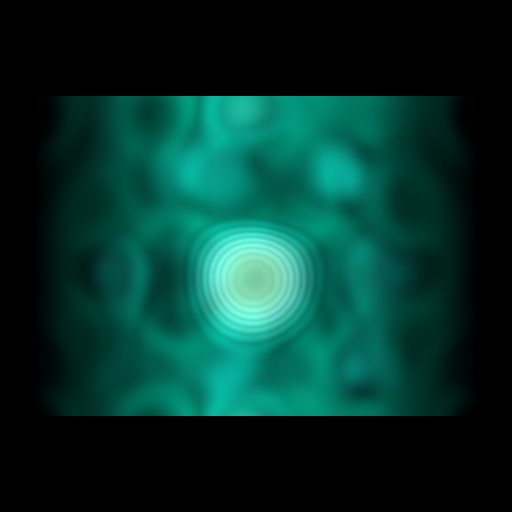

In [138]:
We6.show_potential_with_yt(angle=np.pi/2,  N_layer=10, cmap='BrBG', show3D=1)

Seems like a proper approximation of a delta function, so all good! 

### Move on to the actual data

In [157]:
We6.phi=RealPhi.real

yt : [INFO     ] 2015-12-17 21:44:42,501 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-12-17 21:44:42,502 Parameters: domain_dimensions         = [401 401 401]
yt : [INFO     ] 2015-12-17 21:44:42,504 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2015-12-17 21:44:42,504 Parameters: domain_right_edge         = [ 2.  2.  2.]
yt : [INFO     ] 2015-12-17 21:44:42,505 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-12-17 21:44:42,692 Loading field plugins.
yt : [INFO     ] 2015-12-17 21:44:42,692 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,693 Loaded astro (15 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,693 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,694 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,696 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-12-17 21:44:42,697 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-12-17 21:44:4


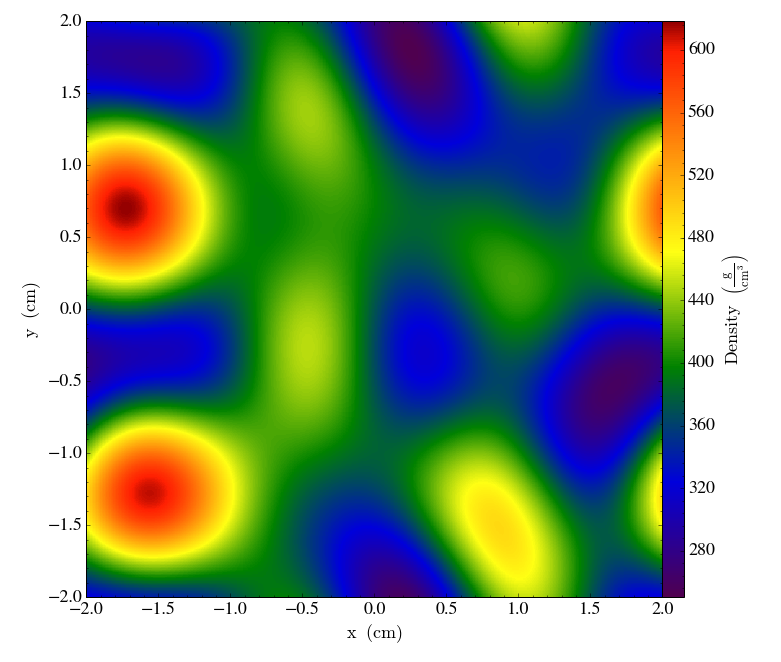

yt : [INFO     ] 2015-12-17 21:45:21,354 Saving plot phi_Slice_z_density.png


In [158]:
We6.show_potential_with_yt(0,  N_layer=10, cmap='BrBG',show3D=0, Slice=1)

And this is exactly Figure 3a from the proposal! Yay!


To do the projection, cut the x=1 sphere and project using a Mollweider projection

In [159]:
x_vec=np.sqrt(x**2+y**2+z**2)
unit_norm_ind=(x_vec==1)
#unit_norm_ind_upper=(x_vec<1.01)
#unit_norm_ind_lower=(0.99<x_vec)
#unit_norm_ind=unit_norm_ind_upper*unit_norm_ind_lower

In [160]:
polar_theta, polar_phi=np.arctan2(y[unit_norm_ind], x[unit_norm_ind]), np.arccos(z[unit_norm_ind]/x_vec[unit_norm_ind])
polar_theta[np.isnan(polar_theta)] = np.pi/2.0

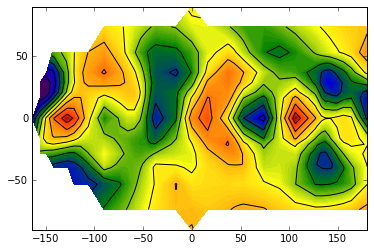

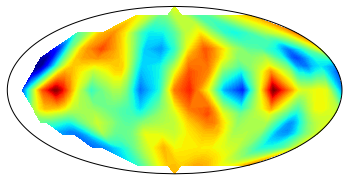

In [161]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Z=np.zeros(len(We6.phi[unit_norm_ind]))
Z = We6.phi[unit_norm_ind]

points=np.zeros((len(polar_theta),2))
points[:,0]=polar_theta
points[:,1]=polar_phi
from scipy.interpolate import griddata
utheta,uphi=np.unique(polar_theta), np.unique(polar_phi)
phiphi,thetatheta=np.meshgrid(utheta,uphi)
ZZ= griddata(points, Z.reshape(len(Z)), (phiphi,thetatheta), method='cubic')

plt.figure()
ax = plt.subplot(111)#, projection='mollweide')
ax.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,100)
ax.contour((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ,10,colors='k')

plt.show()

m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(phiphi,thetatheta, ZZ, 10, colors='k',latlon=True)
m.contourf((phiphi)*360/(2*np.pi),(thetatheta-np.pi/2)*360/(2*np.pi), ZZ, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

And this works!! Yay!